In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
import os 
os.getcwd()
os.chdir('C:/Users/hp/Desktop/btd1_project/Brain_tumor')
print(os.getcwd())

C:\Users\hp\Desktop\btd1_project\Brain_tumor


In [6]:
training_set = train_datagen.flow_from_directory('C:/Users/hp/Desktop/btd1_project/Brain_tumor/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/hp/Desktop/btd1_project/Brain_tumor/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 22 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6987 - acc: 0.4545 - val_loss: 0.8402 - val_acc: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 272ms/step - loss: 0.9168 - acc: 0.5909 - val_loss: 0.6657 - val_acc: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 342ms/step - loss: 0.6563 - acc: 0.5909 - val_loss: 0.7537 - val_acc: 0.4286
Epoch 4/100
1/1 [==============================] - 0s 303ms/step - loss: 0.6964 - acc: 0.4091 - val_loss: 0.7674 - val_acc: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 374ms/step - loss: 0.6884 - acc: 0.4091 - val_loss: 0.7427 - val_acc: 0.4286
Epoch 6/100
1/1 [==============================] - 0s 312ms/step - loss: 0.6684 - acc: 0.5909 - val_loss: 0.7156 - val_acc: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 389ms/step - loss: 0.6382 - acc: 0.8182 - val_loss: 0.6930 - val_acc: 0.4286
Epoch 8/100
1/1 [==============================] - 0s 327ms/step - loss: 0.6294 - acc:

Epoch 64/100
1/1 [==============================] - 0s 391ms/step - loss: 0.1884 - acc: 0.9545 - val_loss: 2.5445 - val_acc: 0.4286
Epoch 65/100
1/1 [==============================] - 0s 368ms/step - loss: 0.2947 - acc: 0.8636 - val_loss: 2.2905 - val_acc: 0.5714
Epoch 66/100
1/1 [==============================] - 0s 293ms/step - loss: 0.2176 - acc: 0.9091 - val_loss: 2.0249 - val_acc: 0.5714
Epoch 67/100
1/1 [==============================] - 0s 370ms/step - loss: 0.0867 - acc: 0.9545 - val_loss: 1.9003 - val_acc: 0.5714
Epoch 68/100
1/1 [==============================] - 0s 283ms/step - loss: 0.1056 - acc: 1.0000 - val_loss: 1.8955 - val_acc: 0.4286
Epoch 69/100
1/1 [==============================] - 0s 360ms/step - loss: 0.1176 - acc: 0.9545 - val_loss: 1.9371 - val_acc: 0.5714
Epoch 70/100
1/1 [==============================] - 0s 268ms/step - loss: 0.1076 - acc: 1.0000 - val_loss: 2.0541 - val_acc: 0.5714
Epoch 71/100
1/1 [==============================] - 0s 397ms/step - loss: 0.

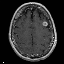

In [8]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/hp/Desktop/btd1_project/TestImages/f3cdd4e71aaab8707bd4639e98b9bc.jpg', target_size = (64, 64))
test_image

In [9]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[4., 4., 4.],
         [1., 1., 1.],
         [0., 0., 0.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [10]:
result = classifier.predict(test_image)
result

array([[0.]], dtype=float32)

In [11]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [12]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Benign
